<a href="https://colab.research.google.com/github/Demon-Sheriff/Linear-Alg_ML_fs/blob/master/Jamboree_LR_case_study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
!gdown 1UCnSk_NN02jlzj0bbSZ_j-gdGUDDJxy4

Downloading...
From: https://drive.google.com/uc?id=1UCnSk_NN02jlzj0bbSZ_j-gdGUDDJxy4
To: /content/Jamboree.csv
100% 16.2k/16.2k [00:00<00:00, 46.6MB/s]


In [9]:
import pandas as pd
import numpy as np
import seaborn as sns

In [10]:
path = '/content/Jamboree.csv'
df = pd.read_csv(path)

In [31]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1.819238,1.778865,0.775582,1.137360,1.098944,1.776806,0.886405,1.406107
1,0.667148,-0.031601,0.775582,0.632315,1.098944,0.485859,0.886405,0.271349
2,-0.041830,-0.525364,-0.099793,-0.377773,0.017306,-0.954043,0.886405,-0.012340
3,0.489904,0.462163,-0.099793,0.127271,-1.064332,0.154847,0.886405,0.555039
4,-0.219074,-0.689952,-0.975168,-1.387862,-0.523513,-0.606480,-1.128152,-0.508797


In [32]:
df.isna().sum()

,0
GRE Score,0
TOEFL Score,0
University Rating,0
SOP,0
LOR,0
CGPA,0
Research,0
Chance of Admit,0


In [60]:
df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

In [61]:
X = df.drop(columns=['Chance of Admit '])
y = df['Chance of Admit ']

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [63]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(400, 7)
(400,)
(100, 7)
(100,)


In [64]:
# scaling the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

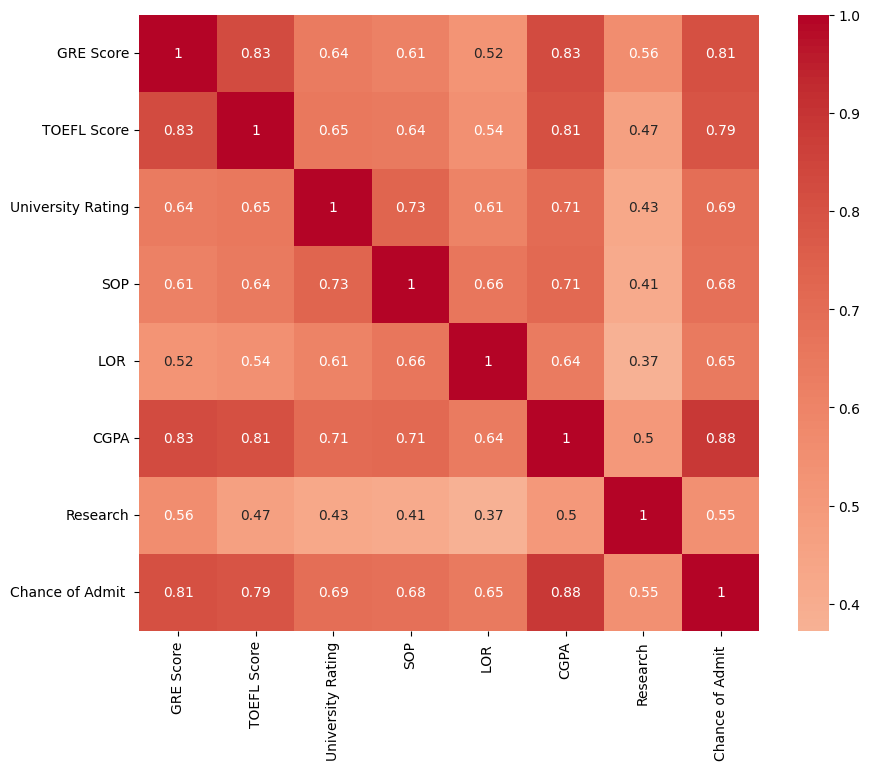

In [65]:
# checking up correlation
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate correlation matrix
corr_matrix = df.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.show()


In [66]:
# checking up VIF

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data['feature'] = df.columns
vif_data['VIF'] = [variance_inflation_factor(df, i) for i in range(df.shape[1])]

print(vif_data)


             feature       VIF
0          GRE Score  4.588456
1        TOEFL Score  3.984671
2  University Rating  2.634047
3                SOP  2.835907
4               LOR   2.102165
5               CGPA  6.223002
6           Research  1.535125
7   Chance of Admit   5.614846


In [67]:
df.shape

(500, 8)

In [68]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1.819238,1.778865,0.775582,1.137360,1.098944,1.776806,0.886405,1.406107
1,0.667148,-0.031601,0.775582,0.632315,1.098944,0.485859,0.886405,0.271349
2,-0.041830,-0.525364,-0.099793,-0.377773,0.017306,-0.954043,0.886405,-0.012340
3,0.489904,0.462163,-0.099793,0.127271,-1.064332,0.154847,0.886405,0.555039
4,-0.219074,-0.689952,-0.975168,-1.387862,-0.523513,-0.606480,-1.128152,-0.508797


In [69]:
from sklearn.decomposition import PCA

# Apply PCA
pca = PCA()
pca.fit(df)

# Explained variance by each component
print("Explained Variance Ratio:", pca.explained_variance_ratio_)

Explained Variance Ratio: [0.6928982  0.09313708 0.0715203  0.04882634 0.03305423 0.02674101
 0.01981438 0.01400846]


In [70]:
X

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,1.819238,1.778865,0.775582,1.137360,1.098944,1.776806,0.886405
1,0.667148,-0.031601,0.775582,0.632315,1.098944,0.485859,0.886405
2,-0.041830,-0.525364,-0.099793,-0.377773,0.017306,-0.954043,0.886405
3,0.489904,0.462163,-0.099793,0.127271,-1.064332,0.154847,0.886405
4,-0.219074,-0.689952,-0.975168,-1.387862,-0.523513,-0.606480,-1.128152
...,...,...,...,...,...,...,...
495,1.376126,0.132987,1.650957,1.137360,0.558125,0.734118,0.886405
496,1.819238,1.614278,1.650957,1.642404,1.639763,2.140919,0.886405
497,1.198882,2.108041,1.650957,1.137360,1.639763,1.627851,0.886405
498,-0.396319,-0.689952,0.775582,0.632315,1.639763,-0.242367,-1.128152


In [71]:
y

,Chance of Admit
0,1.406107
1,0.271349
2,-0.012340
3,0.555039
4,-0.508797
...,...
495,1.051495
496,1.689797
497,1.477030
498,0.058582


In [72]:
# using normal equations for linear regression.
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [73]:
lin_reg.coef_

array([0.1891537 , 0.12926551, 0.02085081, 0.01268095, 0.11252193,
       0.47930102, 0.08468482])

In [74]:
lin_reg.intercept_

0.01726960239859015

In [75]:
y_pred = lin_reg.predict(X_test)

In [76]:
lin_reg.score(X_test, y_test)

0.8188432567829627

In [77]:
# 0.81 score is not bad at all

# **Calculating R squared MSE and MAE**

In [78]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

r2 = r2_score(y_test, y_pred)
print("R² Score:", r2)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)

R² Score: 0.8188432567829627
Mean Squared Error: 0.18634363515918598
Mean Absolute Error: 0.30299928245468544


# **Using SGD regressor from sklearn**

In [79]:
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error, r2_score

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.01, learning_rate='invscaling', random_state=42) # no regularization applied
sgd_reg.fit(X_train, y_train)

SGDRegressor(penalty=None)

In [84]:
y_pred = sgd_reg.predict(X_test)

# **Checking the Fit**

In [85]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")

Mean Squared Error: 0.19117742619671124
R² Score: 0.8141440147562535


# **Using StatsModel Linear Regression**

In [87]:
import statsmodels.api as sm
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# add a constant for intercept to the training and test set
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

In [88]:
model = sm.OLS(y_train, X_train)
results = model.fit()

In [90]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:       Chance of Admit    R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     257.0
Date:                Wed, 20 Nov 2024   Prob (F-statistic):          3.41e-142
Time:                        14:41:09   Log-Likelihood:                -221.69
No. Observations:                 400   AIC:                             459.4
Df Residuals:                     392   BIC:                             491.3
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0077      0.02

In [91]:
y_pred = results.predict(X_test)


# **Checking the fit and model score**

In [92]:
from sklearn.metrics import mean_squared_error, r2_score

print("MSE on test data:", mean_squared_error(y_test, y_pred))
print("R-squared on test data:", r2_score(y_test, y_pred))

MSE on test data: 0.18634363515918578
R-squared on test data: 0.8188432567829628
